In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


In [2]:
df_regl = regl_cv()
print(len(df_regl))

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


13086 of 42245 sites with CV values via promoter annotation
42245


In [3]:
# (Chen et al., 2013) PERs -- load
fp_pers_ = 'wget/genome.cshlp.org/content/suppl/2013/04/16/gr.153668.112.DC1/Supp_TableS3.csv'
df_pers_ = pd.read_csv(fp_pers_, sep=',')
print('%d enhancer regions' % (len(df_pers_)))
df_pers = pd.DataFrame()
df_pers['chrom'] = list(map(lambda chrom: 'chr' + chrom, df_pers_['chr']))
df_pers['start'] = df_pers_['start'] - 1
df_pers['end'] = df_pers_['end']
#df_pers.head()

2361 enhancer regions


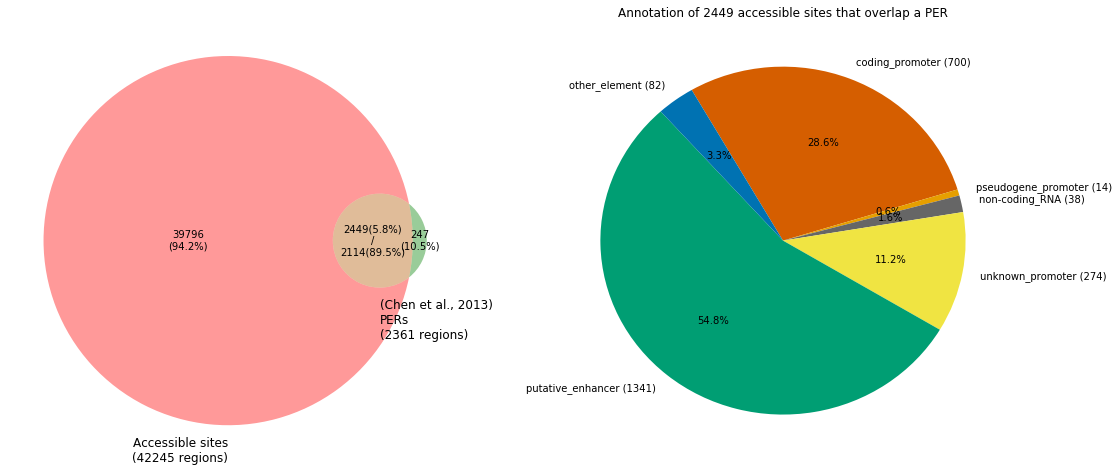

In [4]:
# (Chen et al., 2013) PERs -- plot
gv = yp.GenomicVenn2(
    BedTool.from_dataframe(df_regl[yp.NAMES_BED3 + ['annot']]),
    BedTool.from_dataframe(df_pers[yp.NAMES_BED3]),
    label_a='Accessible sites',
    label_b='(Chen et al., 2013)\nPERs',
)

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
gv.plot()

plt.subplot(1,2,2)
df_regl_with_per = gv.df_a_with_b
annot_count_ = df_regl_with_per['name'].value_counts()[config['annot']]
plt.title('Annotation of %d accessible sites that overlap a PER' % (len(df_regl_with_per),))
plt.pie(
    annot_count_.values,
    labels = ['%s (%d)' % (l, c) for l, c in annot_count_.iteritems()],
    colors=[yp.RED, yp.ORANGE, '0.4', yp.YELLOW, yp.GREEN, yp.BLUE],
    counterclock=False,
    startangle=120,
    autopct='%.1f%%',
);
plt.savefig('annot/FigA_overlaps/overlaps_Chen2013_PER.pdf', bbox_inches='tight')

In [5]:
# (Chen et al., 2013) PERs now annotated as coding_promoter
fp_ = 'annot/FigA_overlaps/overlaps_Chen2013_PER_coding_promoter_only.bed'
df_regl_with_per.query('name == "coding_promoter"').to_csv(fp_, header=False, sep='\t', index=False)

In [6]:
# (Evans et al., 2016) enhancers -- load
#!cd ~/relmapping/wget; wget -m --no-parent http://www.pnas.org/content/suppl/2016/10/25/1608162113.DCSupplemental/pnas.1608162113.sd01.xlsx
#!cd ~/relmapping/wget; wget -m --no-parent http://www.pnas.org/content/suppl/2016/10/25/1608162113.DCSupplemental/pnas.1608162113.sd02.xlsx   
# .csv files are obtained by manually exporting from Excel
fp_ee_auto = 'wget/www.pnas.org/content/suppl/2016/10/25/1608162113.DCSupplemental/EE_autosome_states.csv'
fp_ee_chrx = 'wget/www.pnas.org/content/suppl/2016/10/25/1608162113.DCSupplemental/EE_chrX_states.csv'
fp_l3_auto = 'wget/www.pnas.org/content/suppl/2016/10/25/1608162113.DCSupplemental/L3_autosome_states.csv'
fp_l3_chrx = 'wget/www.pnas.org/content/suppl/2016/10/25/1608162113.DCSupplemental/L3_chrX_states.csv'

df_l3_auto_enh = pd.read_csv(fp_ee_auto, names=['chrom', 'start', 'end', 'state'])\
    .query('state == 8 | state == 9 | state == 10').reset_index(drop=True)
df_l3_auto_enh['chrom'] = list(map(lambda chrom: 'chr' + chrom, df_l3_auto_enh['chrom']))

21328 len(df_a_only)
3745 len(df_b_only)


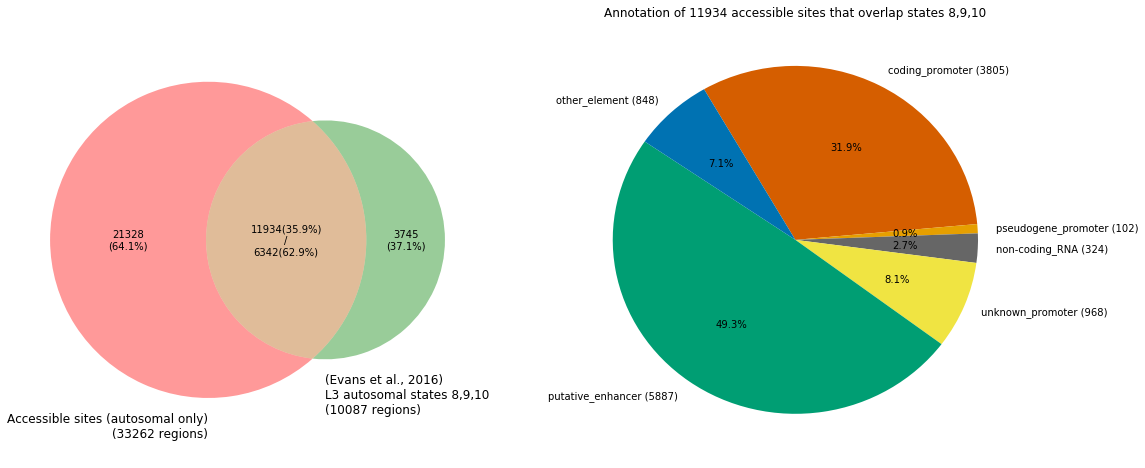

In [7]:
# (Evans et al., 2016) enhancers -- plot
bt_regl = BedTool.from_dataframe(df_regl[yp.NAMES_BED3 + ['annot']].query('chrom != "chrX"'))
bt_ref = BedTool.from_dataframe(df_l3_auto_enh)
gv = yp.GenomicVenn2(
    bt_regl,
    bt_ref,
    label_a='Accessible sites (autosomal only)',
    label_b='(Evans et al., 2016)\nL3 autosomal states 8,9,10',
    v=True,
)

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
gv.plot()

plt.subplot(1,2,2)
df_regl_with_ref = gv.df_a_with_b
annot_count_ = df_regl_with_ref['name'].value_counts()[config['annot']]
plt.title('Annotation of %d accessible sites that overlap states 8,9,10' % (len(df_regl_with_ref),))
plt.pie(
    annot_count_.values,
    labels = ['%s (%d)' % (l, c) for l, c in annot_count_.iteritems()],
    colors=[yp.RED, yp.ORANGE, '0.4', yp.YELLOW, yp.GREEN, yp.BLUE],
    counterclock=False,
    startangle=120,
    autopct='%.1f%%',
);
plt.savefig('annot/FigA_overlaps/overlaps_Evans2016_L3_enhancers.pdf', bbox_inches='tight')

In [8]:
# (Ho et al., 2014) enhancers -- load
df_hmm_ee = pd.read_csv('wget/compbio.med.harvard.edu/modencode/webpage/hihmm/iHMM.M1K16.worm_EE.bed', sep='\t', names=yp.NAMES_BED9)
df_hmm_l3 = pd.read_csv('wget/compbio.med.harvard.edu/modencode/webpage/hihmm/iHMM.M1K16.worm_L3.bed', sep='\t', names=yp.NAMES_BED9)
df_hmm_ee['chrom'] = list(map(lambda chr: 'chr' + chr, df_hmm_ee['chrom']))
df_hmm_l3['chrom'] = list(map(lambda chr: 'chr' + chr, df_hmm_l3['chrom']))

In [9]:
df_hmm_ee['name'].value_counts().sort_index()

10_Rep1     1117
11_Rep2      921
12_Het1      812
13_Het2     1017
14_Low1     2304
15_Low2     3398
16_Low3     1712
17_Unmap      22
1_Pro       3282
2_Enh1      2743
3_Enh2      3353
4_Egn1       613
5_Egn2       278
6_Egn3      1422
7_Egn4      3235
8_Egn5       988
9_Egn6      2818
Name: name, dtype: int64

In [10]:
df_hmm_l3['name'].value_counts().sort_index()

10_Rep1      582
11_Rep2     1451
12_Het1     1117
13_Het2     1537
14_Low1     1880
15_Low2     2589
16_Low3     2054
17_Unmap      25
1_Pro       2661
2_Enh1      2785
3_Enh2      3711
4_Egn1       815
5_Egn2       852
6_Egn3       965
7_Egn4      3424
8_Egn5      1238
9_Egn6      2675
Name: name, dtype: int64

In [11]:
df_hmm_ee_enh = df_hmm_ee.query('name == "2_Enh1" | name == "3_Enh2"')
df_hmm_l3_enh = df_hmm_l3.query('name == "2_Enh1" | name == "3_Enh2"')
print('%d enhancer-like states in EE' % (len(df_hmm_ee_enh),))
print('%d enhancer-like states in L3' % (len(df_hmm_l3_enh),))

6096 enhancer-like states in EE
6496 enhancer-like states in L3


30267 len(df_a_only)
1101 len(df_b_only)


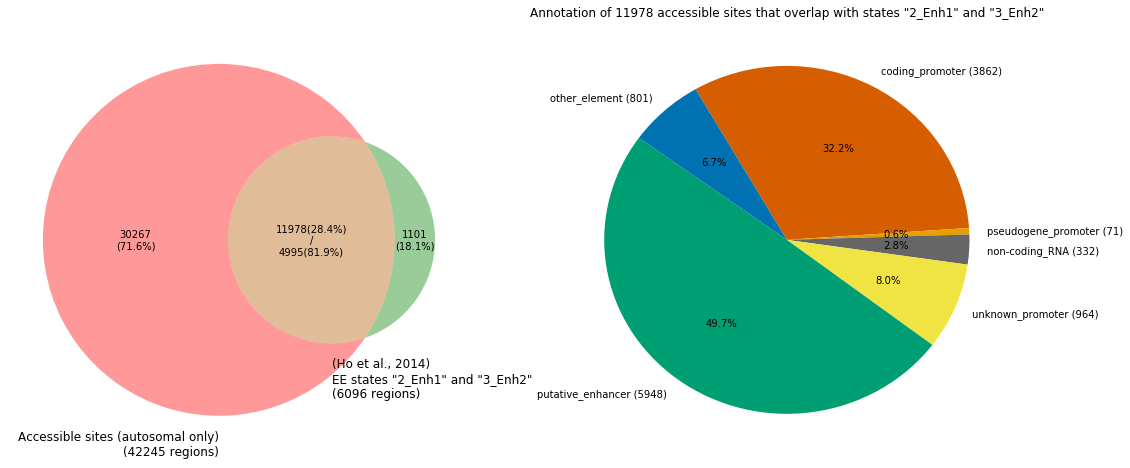

In [12]:
bt_regl = BedTool.from_dataframe(df_regl[yp.NAMES_BED3 + ['annot']])
bt_ref = BedTool.from_dataframe(df_hmm_ee_enh)
gv = yp.GenomicVenn2(
    bt_regl,
    bt_ref,
    label_a='Accessible sites (autosomal only)',
    label_b='(Ho et al., 2014)\nEE states "2_Enh1" and "3_Enh2"',
    v=True,
)

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
gv.plot()

plt.subplot(1,2,2)
df_regl_with_ref = gv.df_a_with_b
annot_count_ = df_regl_with_ref['name'].value_counts()[config['annot']]
plt.title('Annotation of %d accessible sites that overlap with states "2_Enh1" and "3_Enh2"' % (len(df_regl_with_ref),))
plt.pie(
    annot_count_.values,
    labels = ['%s (%d)' % (l, c) for l, c in annot_count_.iteritems()],
    colors=[yp.RED, yp.ORANGE, '0.4', yp.YELLOW, yp.GREEN, yp.BLUE],
    counterclock=False,
    startangle=120,
    autopct='%.1f%%',
);
plt.savefig('annot/FigA_overlaps/overlaps_Ho2014_EE_enhancers.pdf', bbox_inches='tight')

25857 len(df_a_only)
821 len(df_b_only)


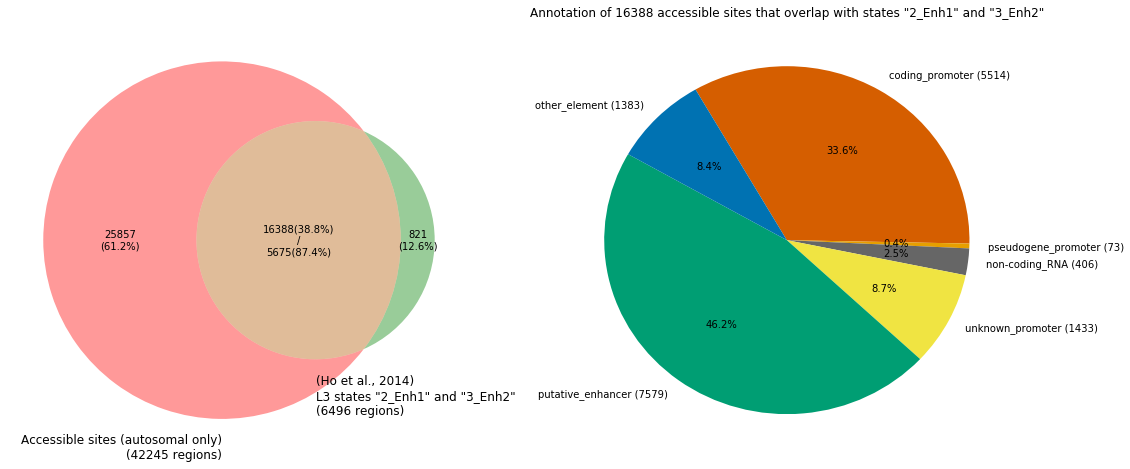

In [13]:
bt_regl = BedTool.from_dataframe(df_regl[yp.NAMES_BED3 + ['annot']])
bt_ref = BedTool.from_dataframe(df_hmm_l3_enh)
gv = yp.GenomicVenn2(
    bt_regl,
    bt_ref,
    label_a='Accessible sites (autosomal only)',
    label_b='(Ho et al., 2014)\nL3 states "2_Enh1" and "3_Enh2"',
    v=True,
)

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
gv.plot()

plt.subplot(1,2,2)
df_regl_with_ref = gv.df_a_with_b
annot_count_ = df_regl_with_ref['name'].value_counts()[config['annot']]
plt.title('Annotation of %d accessible sites that overlap with states "2_Enh1" and "3_Enh2"' % (len(df_regl_with_ref),))
plt.pie(
    annot_count_.values,
    labels = ['%s (%d)' % (l, c) for l, c in annot_count_.iteritems()],
    colors=[yp.RED, yp.ORANGE, '0.4', yp.YELLOW, yp.GREEN, yp.BLUE],
    counterclock=False,
    startangle=120,
    autopct='%.1f%%',
);
plt.savefig('annot/FigA_overlaps/overlaps_Ho2014_L3_enhancers.pdf', bbox_inches='tight')